In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy.plotting import plot

In [2]:
n=int(input("Ingrese el numero de puntos que quiere unir: "))
v_x=[]
v_y=[]
for i in range(0,n):
  print("Ingrese la coordenada x" + str(i) + ":")
  x=float(input(""))
  v_x.append(x)
  print("Ingrese la coordenada y" + str(i) + ":")
  y=float(input(""))
  v_y.append(y)
  print("")

Ingrese el numero de puntos que quiere unir: 3
Ingrese la coordenada x0:
1
Ingrese la coordenada y0:
1

Ingrese la coordenada x1:
5
Ingrese la coordenada y1:
8

Ingrese la coordenada x2:
10
Ingrese la coordenada y2:
-5



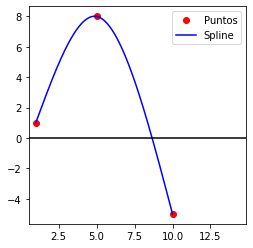

In [3]:
h=np.zeros(n-1)
for i in range(0,n-1):
  h[i]=v_x[i+1]-v_x[i]

w=np.zeros(n-2)
for i in range(1,n-1):
  w[i-1]=((6)/h[i])*(v_y[i+1]-v_y[i])-((6)/h[i-1])*(v_y[i]-v_y[i-1])

a=np.zeros((n-2,n-2))
for i in range(0,n-2):
  for j in range(0,n-2):
    if i==j:
      a[i,j]=2*(h[i]+h[i+1])
    if i==j+1:
      a[i,j]=h[i]
    if i==j-1:
      a[i,j]=h[i+1]

R = np.linalg.solve(a,w)

RF=np.zeros(n)
RF[0]=0
RF[n-1]=0
for i in range(1,n-1):
  RF[i]=R[i-1]


x = sym.Symbol('x')
px_tabla = []
for j in range(0,n-1,1):
  pxtramo = (RF[j]/6)*((((v_x[j+1] - x)**3)/h[j])-h[j]*(v_x[j+1]-x)) + (RF[j+1]/6)*((((x-v_x[j])**3)/h[j])-h[j]*(x - v_x[j]))
  pxtramo = pxtramo + v_y[j]*((v_x[j+1]-x)/h[j]) + v_y[j+1]*((x - v_x[j])/h[j])
        
  pxtramo = pxtramo.expand()
  px_tabla.append(pxtramo)

xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
  a = v_x[tramo-1]
  b = v_x[tramo]
  xtramo = np.linspace(a,b,100)
  pxtramo = px_tabla[tramo-1]
  pxt = sym.lambdify('x',pxtramo)
  ytramo = pxt(xtramo)
  xtraza = np.concatenate((xtraza,xtramo))
  ytraza = np.concatenate((ytraza,ytramo))
  tramo = tramo + 1

plt.plot(v_x,v_y,'ro', label='Puntos')
plt.plot(xtraza,ytraza, label='Spline', color='blue')
plt.legend()
plt.axis('square')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvline(x=0,color='k', linestyle='-')
plt.show()